# ML mini project - Enron dataset

**Group 2**

Margashi T - 1711121

Vignesh V - 1711124

Harshil P - 1711127

Deep S - 1711128

Harsh S - 1711129

Tirth D - 1821018






In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**Enron email dataset**

The Enron email dataset contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

In [ ]:
import pandas as pd
df = pd.read_csv('MyDrive/emails.csv')

In [ ]:
df.head(5)

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
df.shape

(517401, 2)

In [ ]:
print(df.loc[1]['message'])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [ ]:
import email

In [ ]:
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [ ]:
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [ ]:
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [ ]:
df['to'] = get_field("To", df["message"])
df['from'] = get_field("From", df["message"])
df['origin'] = get_field("X-Origin", df["message"])

In [ ]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])

In [ ]:
df.head(2)

,file,message,to,from,origin,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,tim.belden@enron.com,phillip.allen@enron.com,Allen-P,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,john.lavorato@enron.com,phillip.allen@enron.com,Allen-P,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...


In [ ]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])

In [ ]:
df.head(3)

,file,message,to,from,origin,date,subject,X-Folder,X-From,X-To,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,tim.belden@enron.com,phillip.allen@enron.com,Allen-P,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,john.lavorato@enron.com,phillip.allen@enron.com,Allen-P,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,leah.arsdall@enron.com,phillip.allen@enron.com,Allen-P,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!


In [ ]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,file,message,to,from,origin,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,tim.belden@enron.com,phillip.allen@enron.com,Allen-P,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,john.lavorato@enron.com,phillip.allen@enron.com,Allen-P,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,leah.arsdall@enron.com,phillip.allen@enron.com,Allen-P,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p


**Top 20 employees who sent the most mails**

In [ ]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20

,employee
kaminski-v,28465
dasovich-j,28234
kean-s,25351
mann-k,23381
jones-t,19950
shackleton-s,18687
taylor-m,13875
farmer-d,13032
germany-c,12436
beck-s,11830


<Figure size 720x432 with 0 Axes>

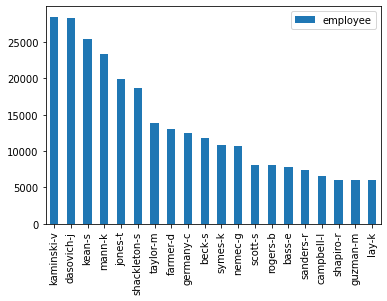

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,6))
top_20.plot(kind = 'bar')

In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, utc=True)
df.head()

,file,message,to,from,origin,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,tim.belden@enron.com,phillip.allen@enron.com,Allen-P,2001-05-14 23:39:00+00:00,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,john.lavorato@enron.com,phillip.allen@enron.com,Allen-P,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,leah.arsdall@enron.com,phillip.allen@enron.com,Allen-P,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randall.gay@enron.com,phillip.allen@enron.com,Allen-P,2000-10-23 13:13:00+00:00,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,greg.piper@enron.com,phillip.allen@enron.com,Allen-P,2000-08-31 12:07:00+00:00,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.,allen-p


In [ ]:
df.dtypes

file                     object
message                  object
to                       object
from                     object
origin                   object
date        datetime64[ns, UTC]
subject                  object
X-Folder                 object
X-From                   object
X-To                     object
body                     object
employee                 object
dtype: object

In [ ]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Day'] = df['date'].dt.dayofweek

In [ ]:
df.head(3)

,file,message,to,from,origin,date,subject,X-Folder,X-From,X-To,body,employee,Month,Year,Day
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,tim.belden@enron.com,phillip.allen@enron.com,Allen-P,2001-05-14 23:39:00+00:00,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p,5,2001,0
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,john.lavorato@enron.com,phillip.allen@enron.com,Allen-P,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p,5,2001,4
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,leah.arsdall@enron.com,phillip.allen@enron.com,Allen-P,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p,10,2000,2


**Distribution of emails by year**

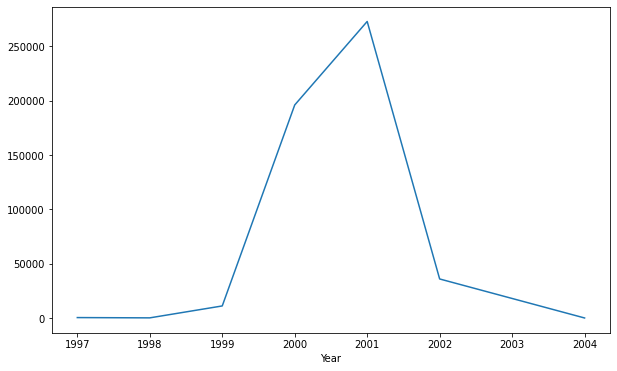

In [ ]:
indices = (df['Year'] > 1995) & (df['Year'] <= 2004)
plt.figure(figsize = (10,6))
figure1 = df.loc[indices].groupby('Year')['body'].count().plot()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']

for i in to_add:
    stopwords.add(i)

**FInding out the most common words in the subject of mails - Wordcloud**

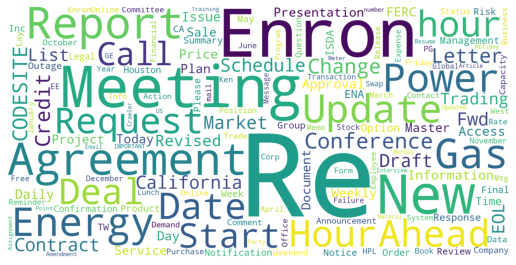

In [ ]:
wordcloud = WordCloud(collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(df['subject'])) 
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Top 20 employees who received max emails**

In [ ]:
top_20_received = pd.DataFrame(df['to'].value_counts()[:20])
top_20_received

,to
pete.davis@enron.com,9155
tana.jones@enron.com,5677
sara.shackleton@enron.com,4974
vkaminski@aol.com,4870
jeff.dasovich@enron.com,4350
kate.symes@enron.com,3517
all.worldwide@enron.com,3324
mark.taylor@enron.com,3295
kay.mann@enron.com,3085
gerald.nemec@enron.com,3074


<Figure size 720x432 with 0 Axes>

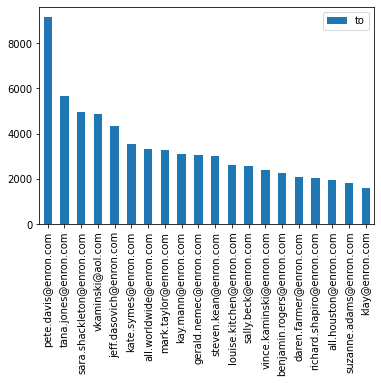

In [ ]:
plt.figure(figsize = (10,6))
top_20_received.plot(kind = 'bar')

In [ ]:
import networkx as nx

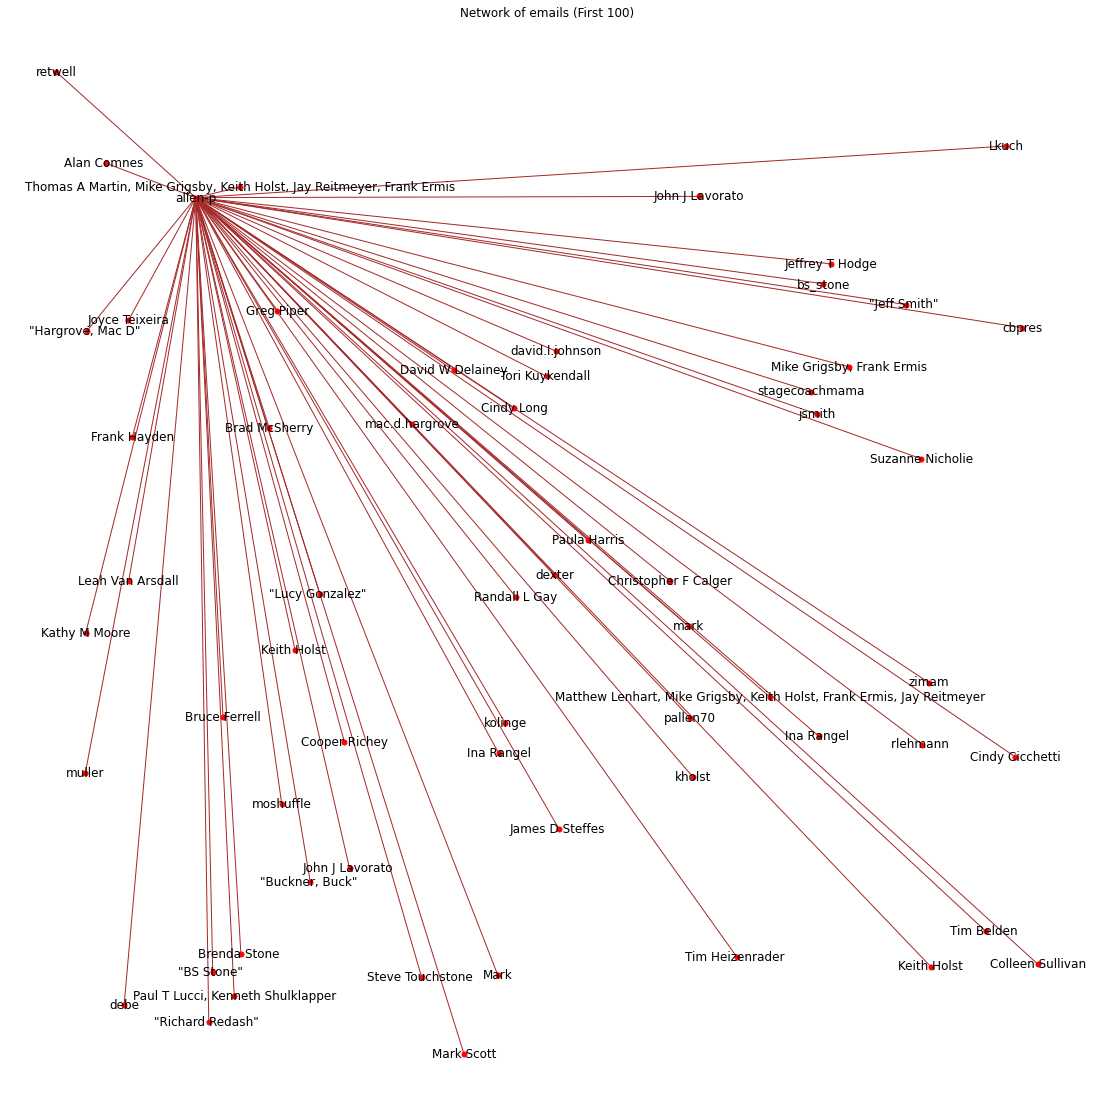

In [ ]:
dfnew = df.head(n=100)

toUSER = []
for user in dfnew['X-To']:
    user = user.split('<')[0]
    user = user.split('@')[0]
    toUSER.append(user)
newlister = list(zip(dfnew['employee'],toUSER))
datanewf = pd.DataFrame(newlister)
datanewf.columns = ['fromuser', 'touser']
G = nx.from_pandas_edgelist(datanewf, 'fromuser', 'touser')
plt.figure(figsize=(15,15))
pos = nx.draw_random(G, node_size = 25, node_color = 'red', edge_color = 'brown', with_labels = True)
plt.title('Network of emails (First 100)')
plt.show()

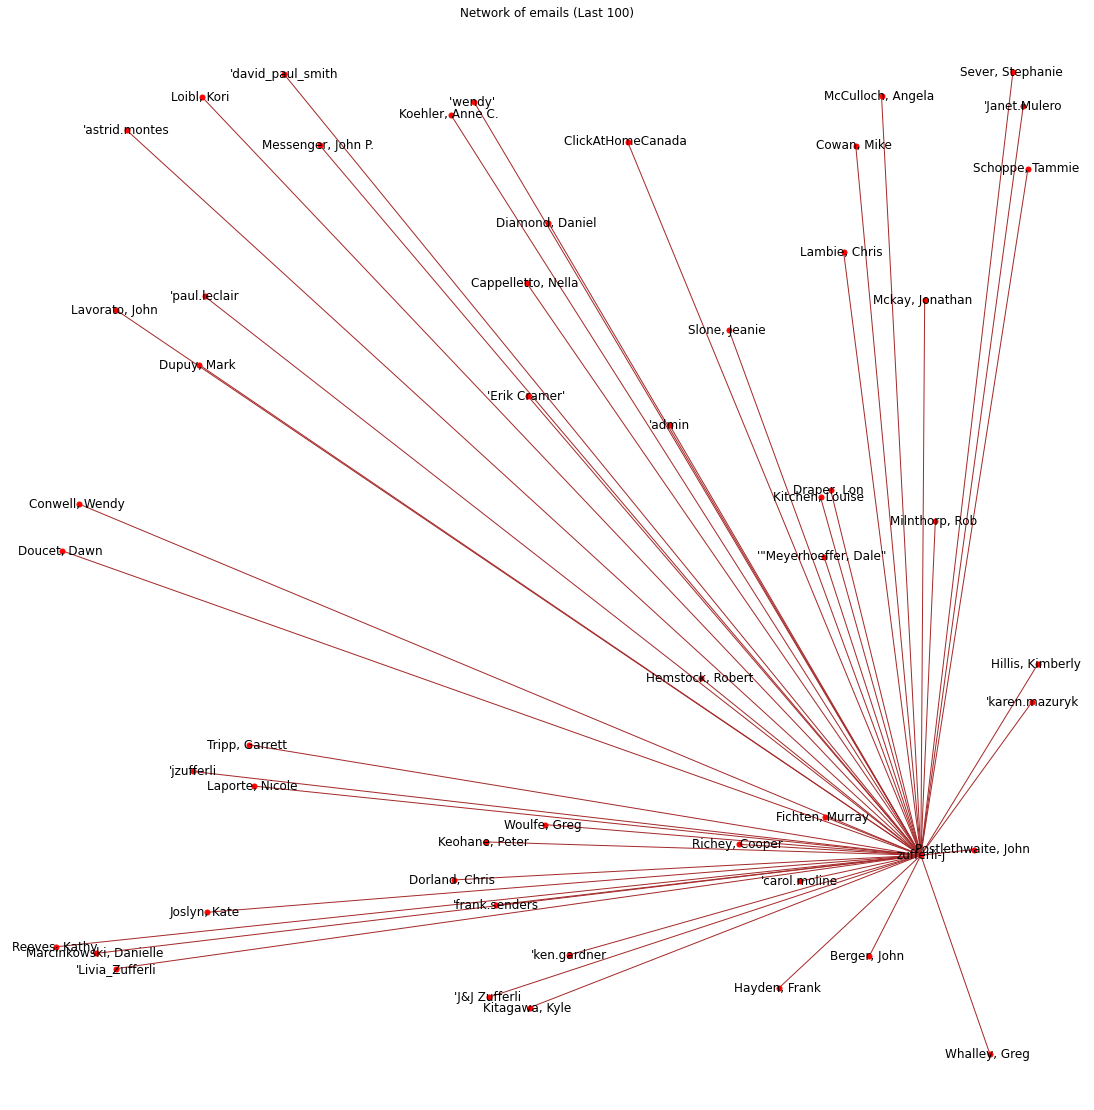

In [ ]:
dfnew = df.tail(n=100)

toUSER = []
for user in dfnew['X-To']:
    user = user.split('<')[0]
    user = user.split('@')[0]
    toUSER.append(user)
newlister = list(zip(dfnew['employee'],toUSER))
datanewf = pd.DataFrame(newlister)
datanewf.columns = ['fromuser', 'touser']
G = nx.from_pandas_edgelist(datanewf, 'fromuser', 'touser')
plt.figure(figsize=(15,15))
pos = nx.draw_random(G, node_size = 25, node_color = 'red', edge_color = 'brown', with_labels = True)
plt.title('Network of emails (Last 100)')
plt.show()

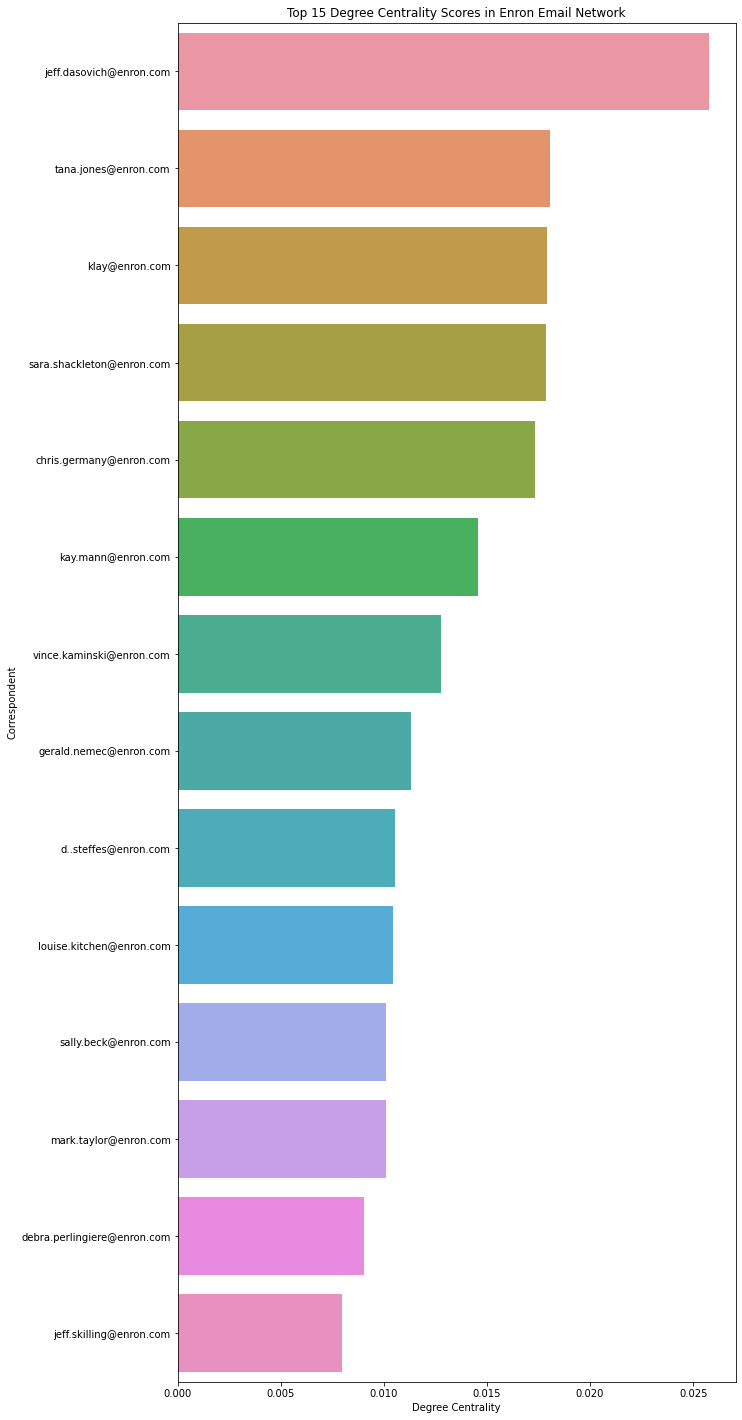

In [ ]:
import seaborn as sns
G = nx.from_pandas_edgelist(df, 'from', 'to')
cent = nx.degree_centrality(G)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(10, 25))
sns.barplot(x='centrality', y='name', data=cent[:15], orient='h')
plt.xlabel('Degree Centrality')
plt.ylabel('Correspondent')
plt.title('Top 15 Degree Centrality Scores in Enron Email Network')
plt.show()

**Enron Financial dataset**

The goal of this dataset was to utilize the financial and email data from Enron to build a predictive, analytic model that could identify whether an individual could be considered a "person of interest" (POI). Since the dataset contained labeled data--culpable persons were already listed as POIs--the value of this model on the existing dataset is limited. Rather, the potential value such a model may provide is in application to other datasets from other companies, to potentially identify suspects worth investigating further.

In [ ]:
import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print ("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [ ]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [ ]:
import pickle
original = "MyDrive/final_project_dataset.pkl" 
destination = "MyDrive/final.pkl" 

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

Converting pickle file to data dictionary , then further converting it to a dataframe

In [ ]:
data_dict = pickle.load(open("MyDrive/final.pkl", "rb"))
print(data_dict)

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'loan_advances': 'NaN', 'bonus': 1200000, 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferred_income': -1386055, 'total_stock_value': 10623258, 'expenses': 11200, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 6680544, 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df2 = pd.DataFrame.from_dict(data_dict, orient="index")
df2.head(10)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
MORDAUNT KRISTINA M,267093,NaN,NaN,628522,NaN,325000,kristina.mordaunt@enron.com,NaN,NaN,208510,35018,NaN,NaN,NaN,1411,NaN,False,NaN,NaN,208510,NaN
MEYER ROCKFORD G,NaN,232,1848227,1848227,NaN,NaN,rockford.meyer@enron.com,NaN,NaN,955873,NaN,0,493489,28,NaN,0,False,NaN,22,462384,NaN
MCMAHON JEFFREY,370448,2355,NaN,4099771,NaN,2600000,jeffrey.mcmahon@enron.com,NaN,NaN,1662855,137108,58,1104054,48,297353,26,False,694862,2228,558801,NaN
HAEDICKE MARK E,374125,4009,2157527,3859065,NaN,1150000,mark.haedicke@enron.com,-329825,-934484,803094,76169,180,608750,1941,52382,61,False,983346,1847,524169,NaN
PIPER GREGORY F,197091,1238,1130036,1737629,NaN,400000,greg.piper@enron.com,-409554,-33333,880290,43057,61,880290,222,778,48,False,NaN,742,409554,NaN


Preprocessing - Handling null values and outliers


In [ ]:
import numpy as np

df2 = df2.replace('NaN',np.NaN)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [ ]:
df2 = df2.drop(['loan_advances'], axis=1)
df2 = df2.drop(['deferred_income'], axis=1)
df2 = df2.drop(['director_fees'], axis=1)
df2 = df2.drop(['restricted_stock_deferred'], axis=1)

In [ ]:
df2['salary'] = df2['salary'].replace(np.NaN, df2['salary'].mean())
df2['to_messages'] = df2['to_messages'].replace(np.NaN, df2['to_messages'].mean())
df2['deferral_payments'] = df2['deferral_payments'].replace(np.NaN, df2['deferral_payments'].mean())
df2['total_payments'] = df2['total_payments'].replace(np.NaN, df2['total_payments'].mean())
df2['bonus'] = df2['bonus'].replace(np.NaN, df2['bonus'].mean())
df2['total_stock_value'] = df2['total_stock_value'].replace(np.NaN, df2['total_stock_value'].mean())
df2['expenses'] = df2['expenses'].replace(np.NaN, df2['expenses'].mean())
df2['from_poi_to_this_person'] = df2['from_poi_to_this_person'].replace(np.NaN, df2['from_poi_to_this_person'].mean())
df2['exercised_stock_options'] = df2['exercised_stock_options'].replace(np.NaN, df2['exercised_stock_options'].mean())
df2['from_messages'] = df2['from_messages'].replace(np.NaN, df2['from_messages'].mean())
df2['from_this_person_to_poi'] = df2['from_this_person_to_poi'].replace(np.NaN, df2['from_this_person_to_poi'].mean())
df2['long_term_incentive'] = df2['long_term_incentive'].replace(np.NaN, df2['long_term_incentive'].mean())
df2['shared_receipt_with_poi'] = df2['shared_receipt_with_poi'].replace(np.NaN, df2['shared_receipt_with_poi'].mean())
df2['restricted_stock'] = df2['restricted_stock'].replace(np.NaN, df2['restricted_stock'].mean())
df2['other'] = df2['other'].replace(np.NaN, df2['other'].mean())

In [ ]:
df2.head(5)

,salary,to_messages,deferral_payments,total_payments,bonus,email_address,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock
METTS MARK,365788.000000,807.000000,1.642674e+06,1061827.000,6.000000e+05,mark.metts@enron.com,585062.0,94299.000000,38.000000,5.987054e+06,29.000000,1.740000e+03,1.000000,False,1.470361e+06,702.000000,585062.0
BAXTER JOHN C,267102.000000,2073.860465,1.295738e+06,5634343.000,1.200000e+06,NaN,10623258.0,11200.000000,64.895349,6.680544e+06,608.790698,2.660303e+06,41.232558,False,1.586055e+06,1176.465116,3942714.0
ELLIOTT STEVEN,170941.000000,2073.860465,1.642674e+06,211725.000,3.500000e+05,steven.elliott@enron.com,6678735.0,78552.000000,64.895349,4.890344e+06,608.790698,1.296100e+04,41.232558,False,1.470361e+06,1176.465116,1788391.0
CORDES WILLIAM R,562194.294737,764.000000,1.642674e+06,5081526.488,2.374235e+06,bill.cordes@enron.com,1038185.0,108728.915789,10.000000,6.518500e+05,12.000000,9.190650e+05,0.000000,False,1.470361e+06,58.000000,386335.0
HANNON KEVIN P,243293.000000,1045.000000,1.642674e+06,288682.000,1.500000e+06,kevin.hannon@enron.com,6391065.0,34039.000000,32.000000,5.538001e+06,32.000000,1.135000e+04,21.000000,True,1.617011e+06,1035.000000,853064.0


In [ ]:
max(df2['salary'])

26704229.0

In [ ]:
df2['salary'].sort_values()

BANNANTINE JAMES M         477.0
GRAY RODNEY               6615.0
WESTFAHL RICHARD K       63744.0
REYNOLDS LAWRENCE        76399.0
BAZELIDES PHILIP J       80818.0
                         ...    
PICKERING MARK R        655037.0
FREVERT MARK A         1060932.0
LAY KENNETH L          1072321.0
SKILLING JEFFREY K     1111258.0
TOTAL                 26704229.0
Name: salary, Length: 146, dtype: float64

In [ ]:
df2.drop('TOTAL', inplace=True)

In [ ]:
df2['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

Correlation matrix between all features 

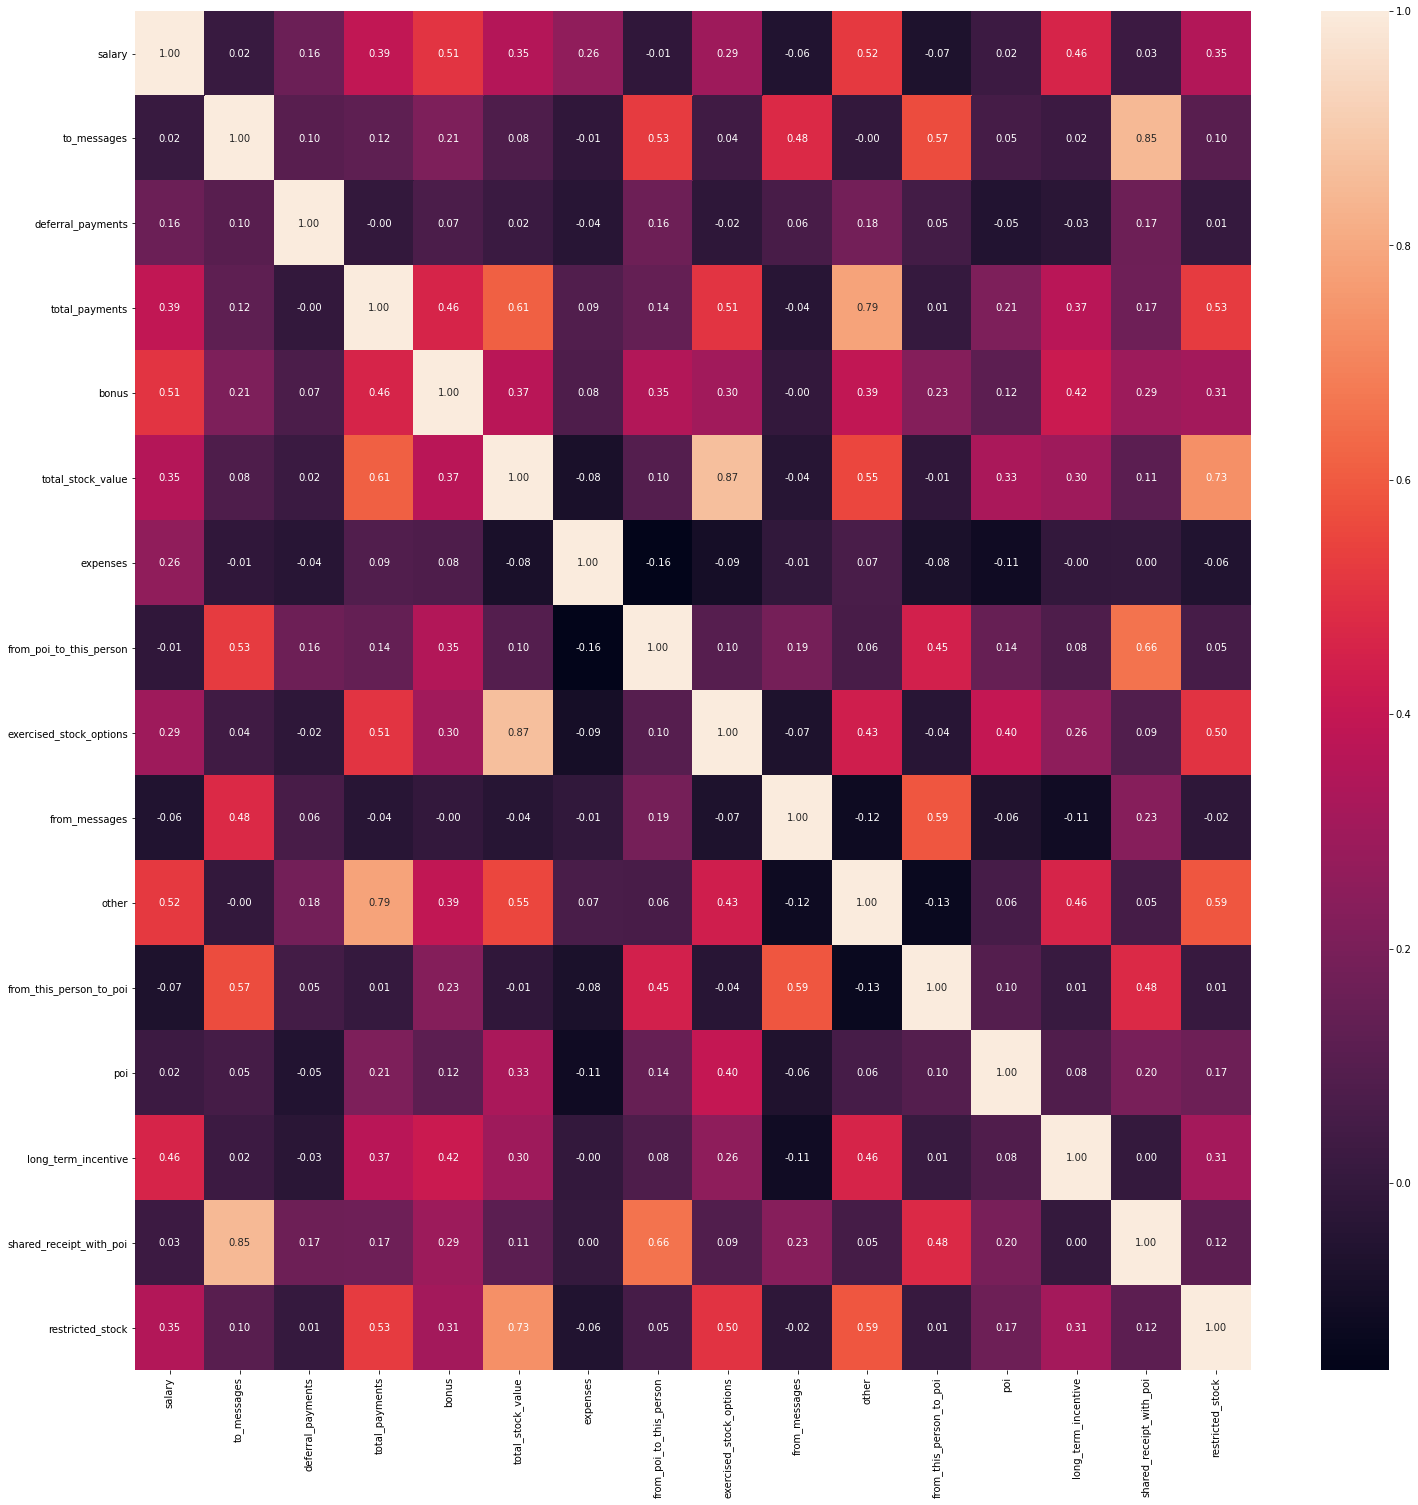

In [ ]:
import seaborn as sns
corr = df2.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
financial_features = ['salary',
 'bonus',
 'exercised_stock_options',
 'restricted_stock',
 'shared_receipt_with_poi',
 'total_payments',
 'expenses',
 'total_stock_value',
 'long_term_incentive',
 'deferral_payments']

Grouping financial features together into a single feature using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
pca.fit(df2[financial_features])
df2['financial'] = pca.transform(df2[financial_features])

In [ ]:
for financial_feature in financial_features:
  df2 = df2.drop(financial_feature, axis=1)

In [ ]:
df2 = df2.drop(['email_address'], axis=1)

In [ ]:
df2.head(10)

,to_messages,from_poi_to_this_person,from_messages,other,from_this_person_to_poi,poi,financial
METTS MARK,807.000000,38.000000,29.000000,1.740000e+03,1.000000,False,-2.552570e+06
BAXTER JOHN C,2073.860465,64.895349,608.790698,2.660303e+06,41.232558,False,6.751145e+06
ELLIOTT STEVEN,2073.860465,64.895349,608.790698,1.296100e+04,41.232558,False,-4.026906e+05
CORDES WILLIAM R,764.000000,10.000000,12.000000,9.190650e+05,0.000000,False,-9.617635e+05
HANNON KEVIN P,1045.000000,32.000000,32.000000,1.135000e+04,21.000000,True,-3.151794e+05
MORDAUNT KRISTINA M,2073.860465,64.895349,608.790698,1.411000e+03,41.232558,False,-3.143407e+06
MEYER ROCKFORD G,232.000000,0.000000,28.000000,9.190650e+05,0.000000,False,-3.571321e+06
MCMAHON JEFFREY,2355.000000,58.000000,48.000000,2.973530e+05,26.000000,False,-1.244521e+06
HAEDICKE MARK E,4009.000000,180.000000,1941.000000,5.238200e+04,61.000000,False,-2.111256e+06
PIPER GREGORY F,1238.000000,61.000000,222.000000,7.780000e+02,48.000000,False,-3.679326e+06


In [ ]:
X = df2.drop(['poi'], axis=1)
Y = df2['poi']

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=df2['poi'])

Importing all classifiers to be tested

In [ ]:
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

Decision tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125

In [ ]:
recall_score(y_test, y_pred)

0.16666666666666666

In [ ]:
precision_score(y_test, y_pred)

0.2

In [ ]:
f1_score(y_test, y_pred)

0.1818181818181818

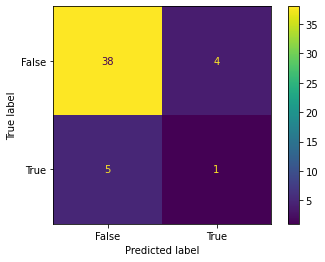

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

In [ ]:
recall_score(y_test, y_pred)

0.16666666666666666

In [ ]:
precision_score(y_test, y_pred)

0.25

In [ ]:
f1_score(y_test, y_pred)

0.2

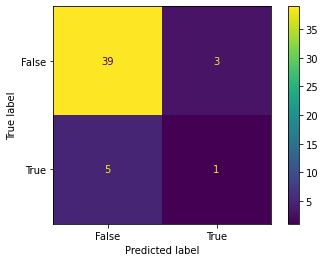

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

K Means

In [ ]:
clf = KMeans(n_clusters=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

In [ ]:
recall_score(y_test, y_pred)

0.0

In [ ]:
precision_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
f1_score(y_test, y_pred)

0.0

SVM

In [ ]:
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

In [ ]:
recall_score(y_test, y_pred)

0.0

In [ ]:
precision_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
f1_score(y_test, y_pred)

0.0

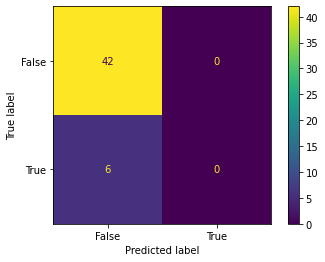

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

Gradient boosting

In [ ]:
gbc=HistGradientBoostingClassifier(learning_rate=0.01, 
        max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
        n_iter_no_change=15, random_state=42)
gbc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

In [ ]:
recall_score(y_test, y_pred)

0.0

In [ ]:
precision_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
f1_score(y_test, y_pred)

0.0

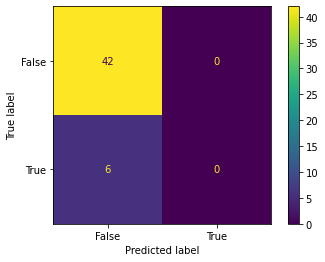

In [ ]:
plot_confusion_matrix(gbc, X_test, y_test) 

Summary of models - Accuracy, Recall, Precision and F1 score

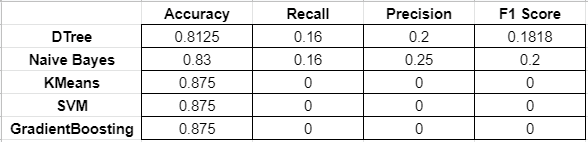

High accuracy overall, but low precision and recall

This goes against our original goal

From kaggle, the goal of the model is to

"To have a best model which can efficiently detect potential POIs given the dataset is so sparse and very skewed towards Non POI s.

Note: Accuracy is not the best metric here give the fact above. The precision score and the recall score are much important factors here. High recall score is a good thing if you can achieve it because we would rather mark a person as POI who in reality is not a POI than not able to catch the Real POIs and marking them as False POIs. My argument here is even though we mark someone as a POI wrongly, he/she will still get through unscathed after investigation. But on the other hand, if we miss someone who is indeed guilty, then that person is just not facing the justice as he/she should have."

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, Y_over = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(X_over)

254

In [ ]:
len(Y_over)

254

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, Y_over, test_size=0.33, random_state=12)

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=23)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

In [ ]:
recall_score(y_test, y_pred)

0.9772727272727273

Perfect!

In [ ]:
y_test

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True, False, False])

In [ ]:
y_pred

array([ True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False, False])

In [ ]:
precision_score(y_test, y_pred)

0.7962962962962963

In [ ]:
f1_score(y_test, y_pred)

0.8775510204081632

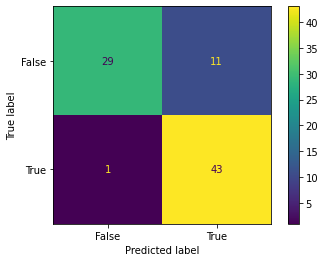

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5595238095238095

In [ ]:
recall_score(y_test, y_pred)

0.18181818181818182

In [ ]:
precision_score(y_test, y_pred)

0.8888888888888888

In [ ]:
f1_score(y_test, y_pred)

0.3018867924528302

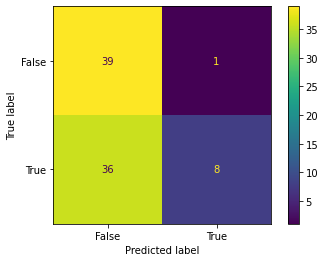

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

In [ ]:
clf = KMeans(n_clusters=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

In [ ]:
recall_score(y_test, y_pred)

0.045454545454545456

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
f1_score(y_test, y_pred)

0.08695652173913045

In [ ]:
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5714285714285714

In [ ]:
recall_score(y_test, y_pred)

0.18181818181818182

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
f1_score(y_test, y_pred)

0.3076923076923077

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
gbc=HistGradientBoostingClassifier(learning_rate=0.01, 
        max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
        n_iter_no_change=15, random_state=42)
gbc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5

In [ ]:
recall_score(y_test, y_pred)

0.18181818181818182

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
f1_score(y_test, y_pred)

0.3076923076923077

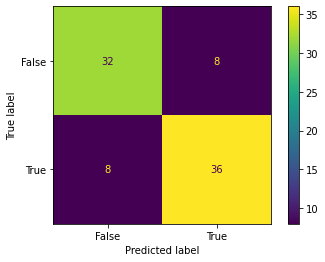

In [ ]:
plot_confusion_matrix(gbc, X_test, y_test) 

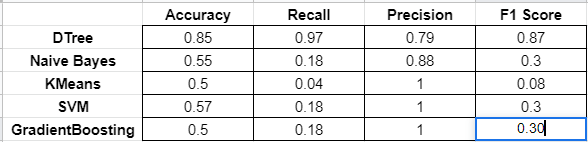

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':(5,7,10,12,15,20), 'criterion':('gini', 'entropy')}

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(dtree, parameters, verbose=5)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=5 .....................................
[CV] ......... criterion=gini, max_depth=5, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ......... criterion=gini, max_depth=5, score=0.853, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ......... criterion=gini, max_depth=5, score=0.853, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ......... criterion=gini, max_depth=5, score=0.912, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ......... criterion=gini, max_depth=5, score=0.882, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ......... criterion=gini, max_depth=7, score=0.941, total=   0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ......... c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                  

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=7, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

In [ ]:
recall_score(y_test, y_pred)

1.0

In [ ]:
precision_score(y_test, y_pred)

0.8627450980392157

In [ ]:
f1_score(y_test, y_pred)

0.9263157894736842

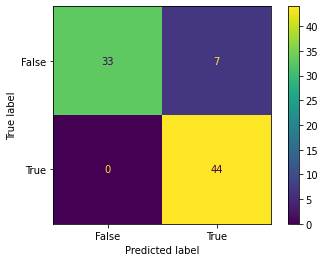

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

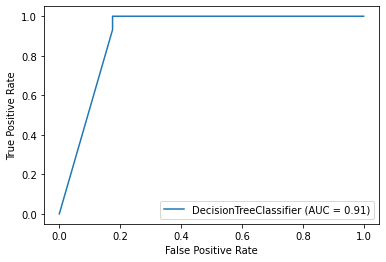

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, y_test)